In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
lokeshmendake_gold_price_prediction_datasets_path = kagglehub.dataset_download('lokeshmendake/gold-price-prediction-datasets')

print('Data source import complete.')


# Gold Price Prediction

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# setting plot style
sns.set(style="whitegrid")

In [ ]:
# Models and Utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading dataset
df = pd.read_csv("/kaggle/input/gold-price-prediction-datasets/Gold_Price_Data.csv")

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Statistical Summary
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# changing format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# checking null values
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

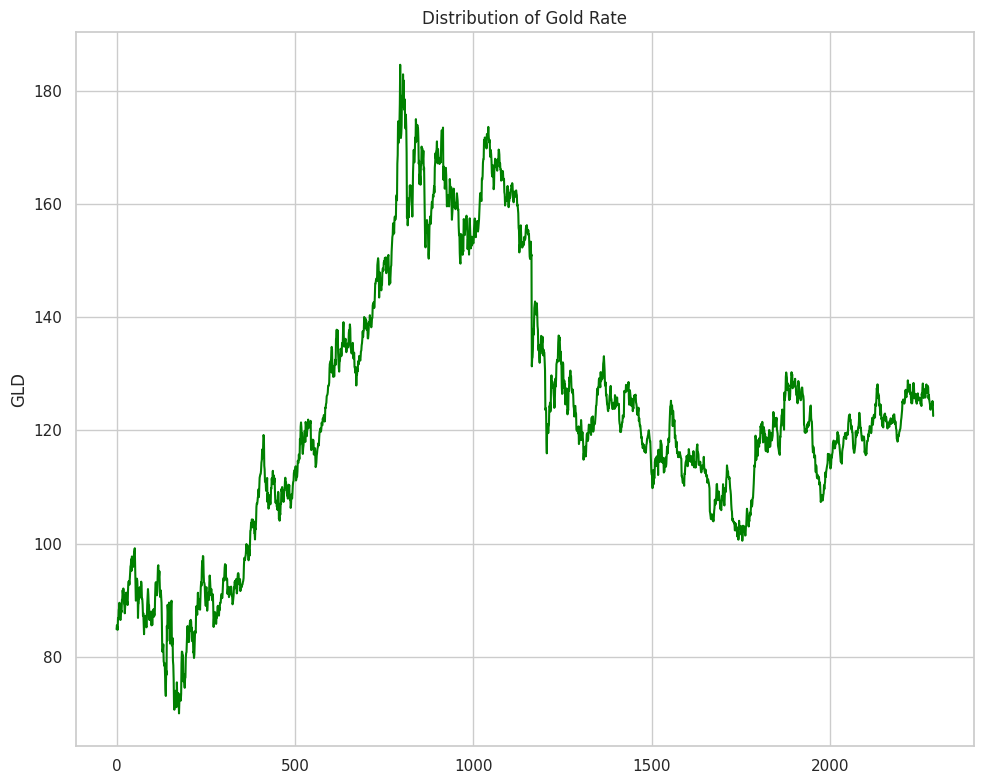

In [ ]:
# Distribution of GLD
plt.figure(figsize = (10, 8))
sns.lineplot(df["GLD"] ,  color = "Green")
plt.title("Distribution of Gold Rate")
plt.tight_layout()

Text(0.5, 1.0, 'Date Distribution')

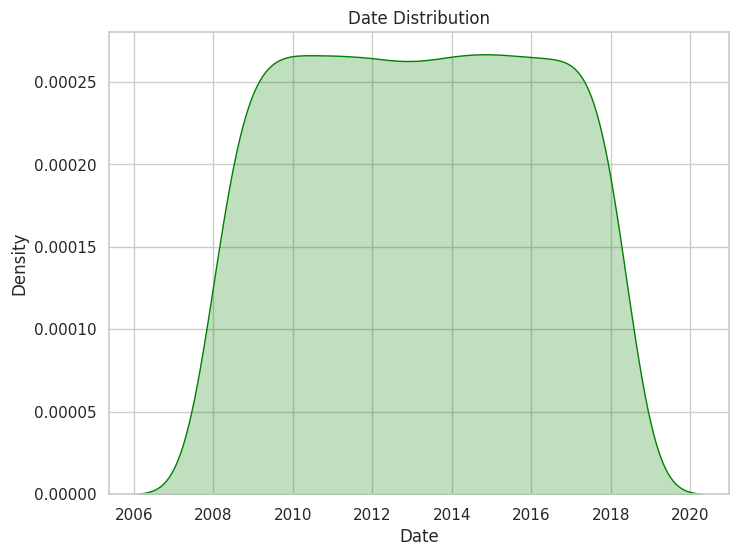

In [ ]:
# Distribution graph of date
plt.figure(figsize = (8, 6))
sns.kdeplot(df["Date"]  , shade = True , color = "Green")
plt.title("Date Distribution")

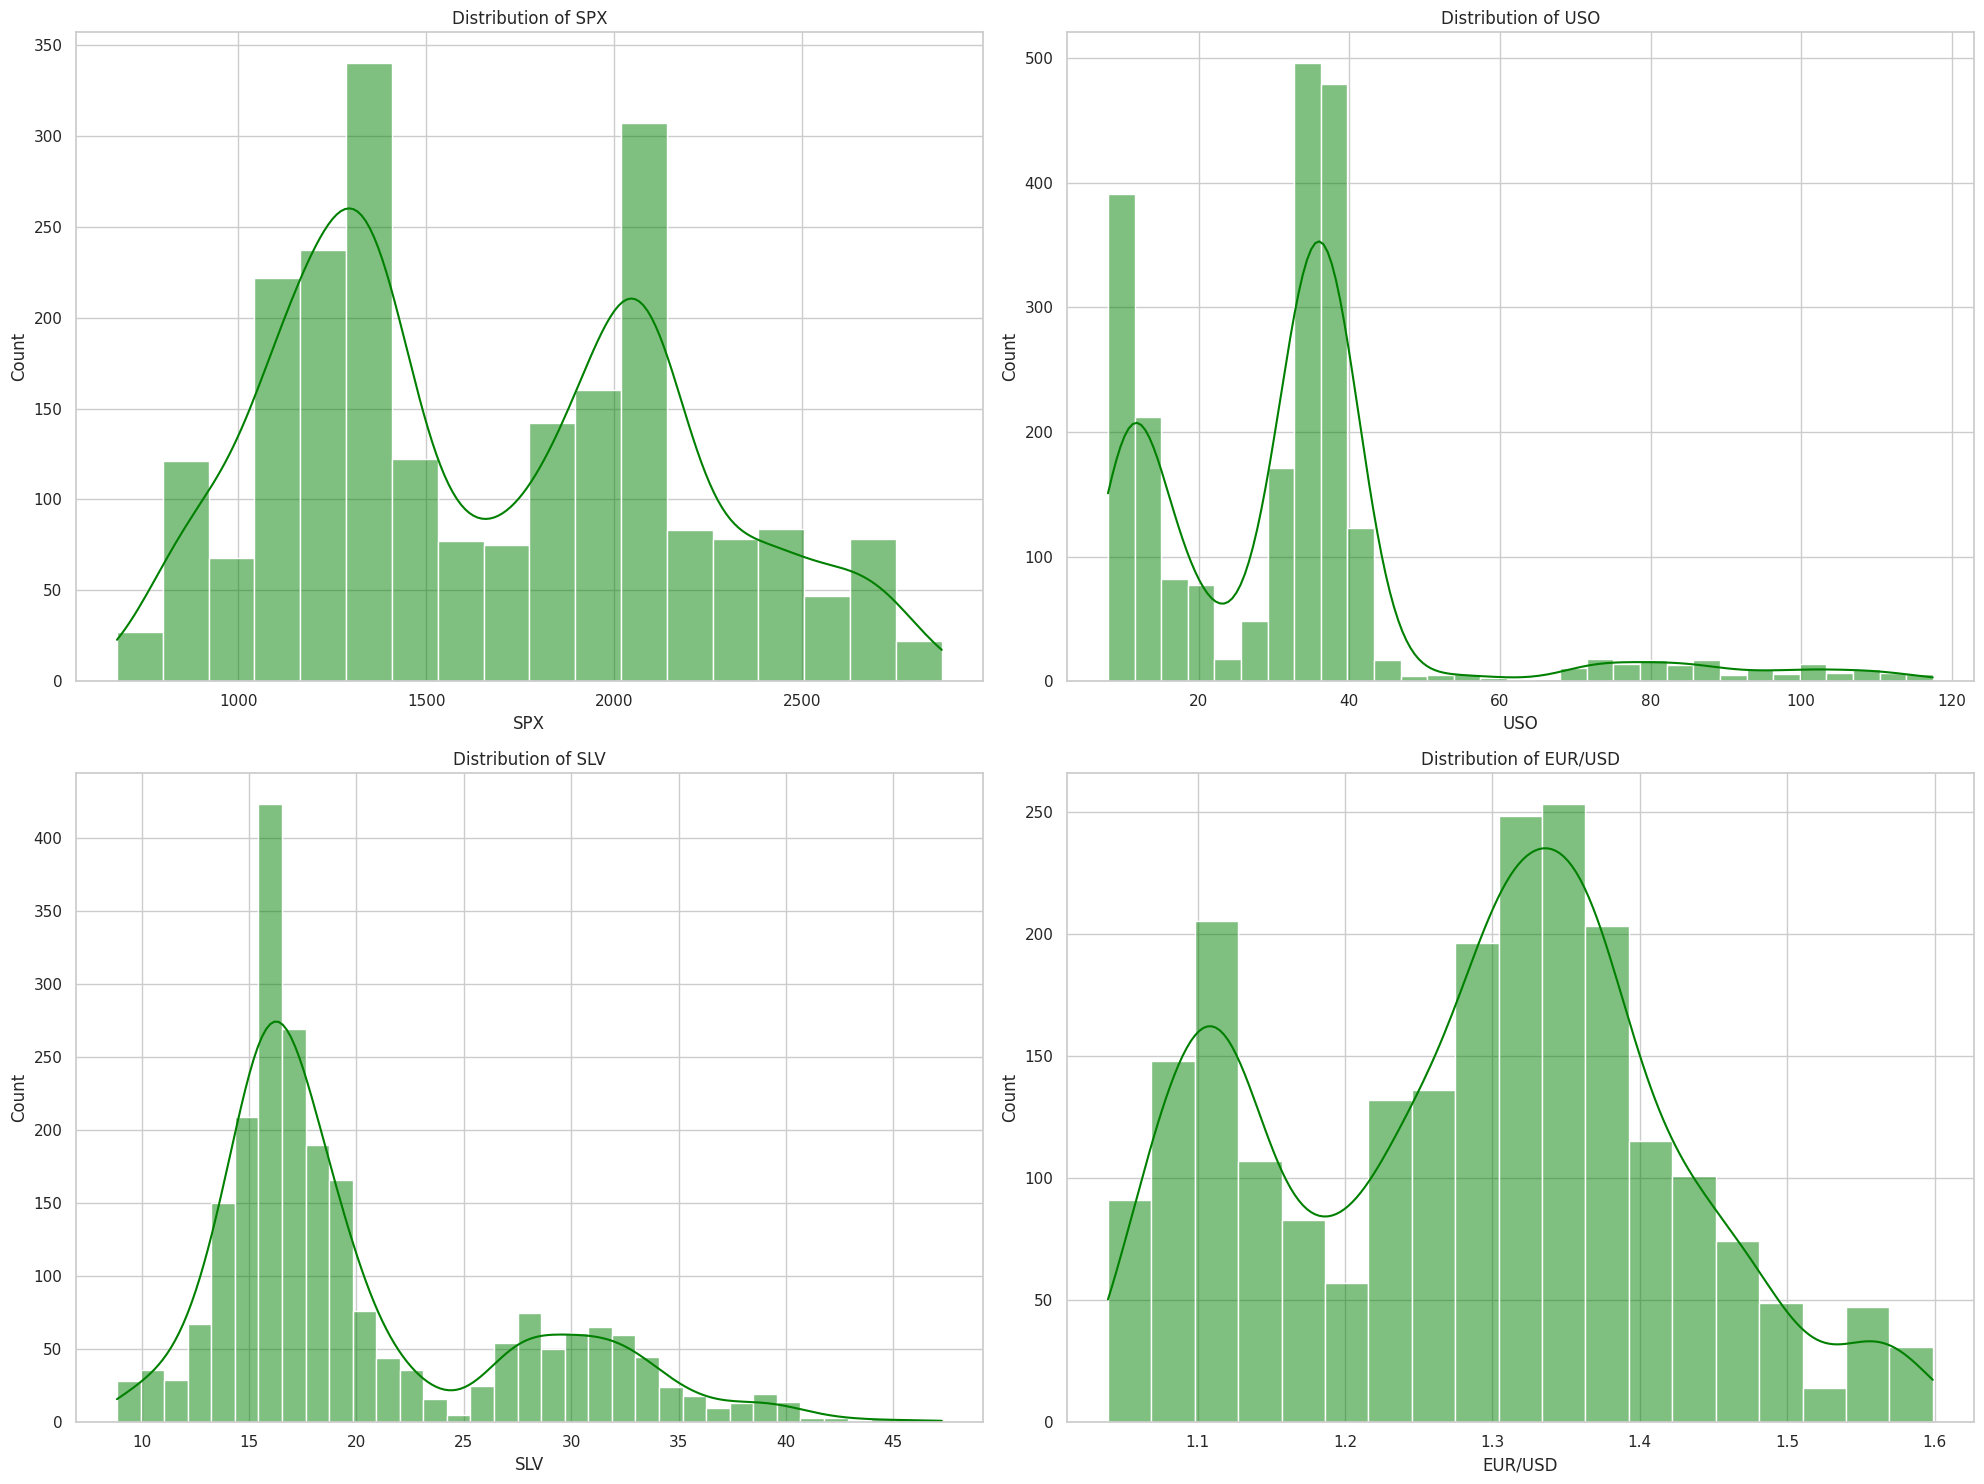

In [ ]:
# plotting columns other than the Date
plot_cols = df.drop(columns = ["Date" , "GLD"]).columns.to_list()

# plotting
plt.figure(figsize = (20  , 15))
for  i , col in enumerate(plot_cols , 1) :
    plt.subplot(2 , 2 , i)
    sns.histplot(df[col] , kde  = True , color = "Green" )
    plt.title(f"Distribution of {col}")

plt.tight_layout()

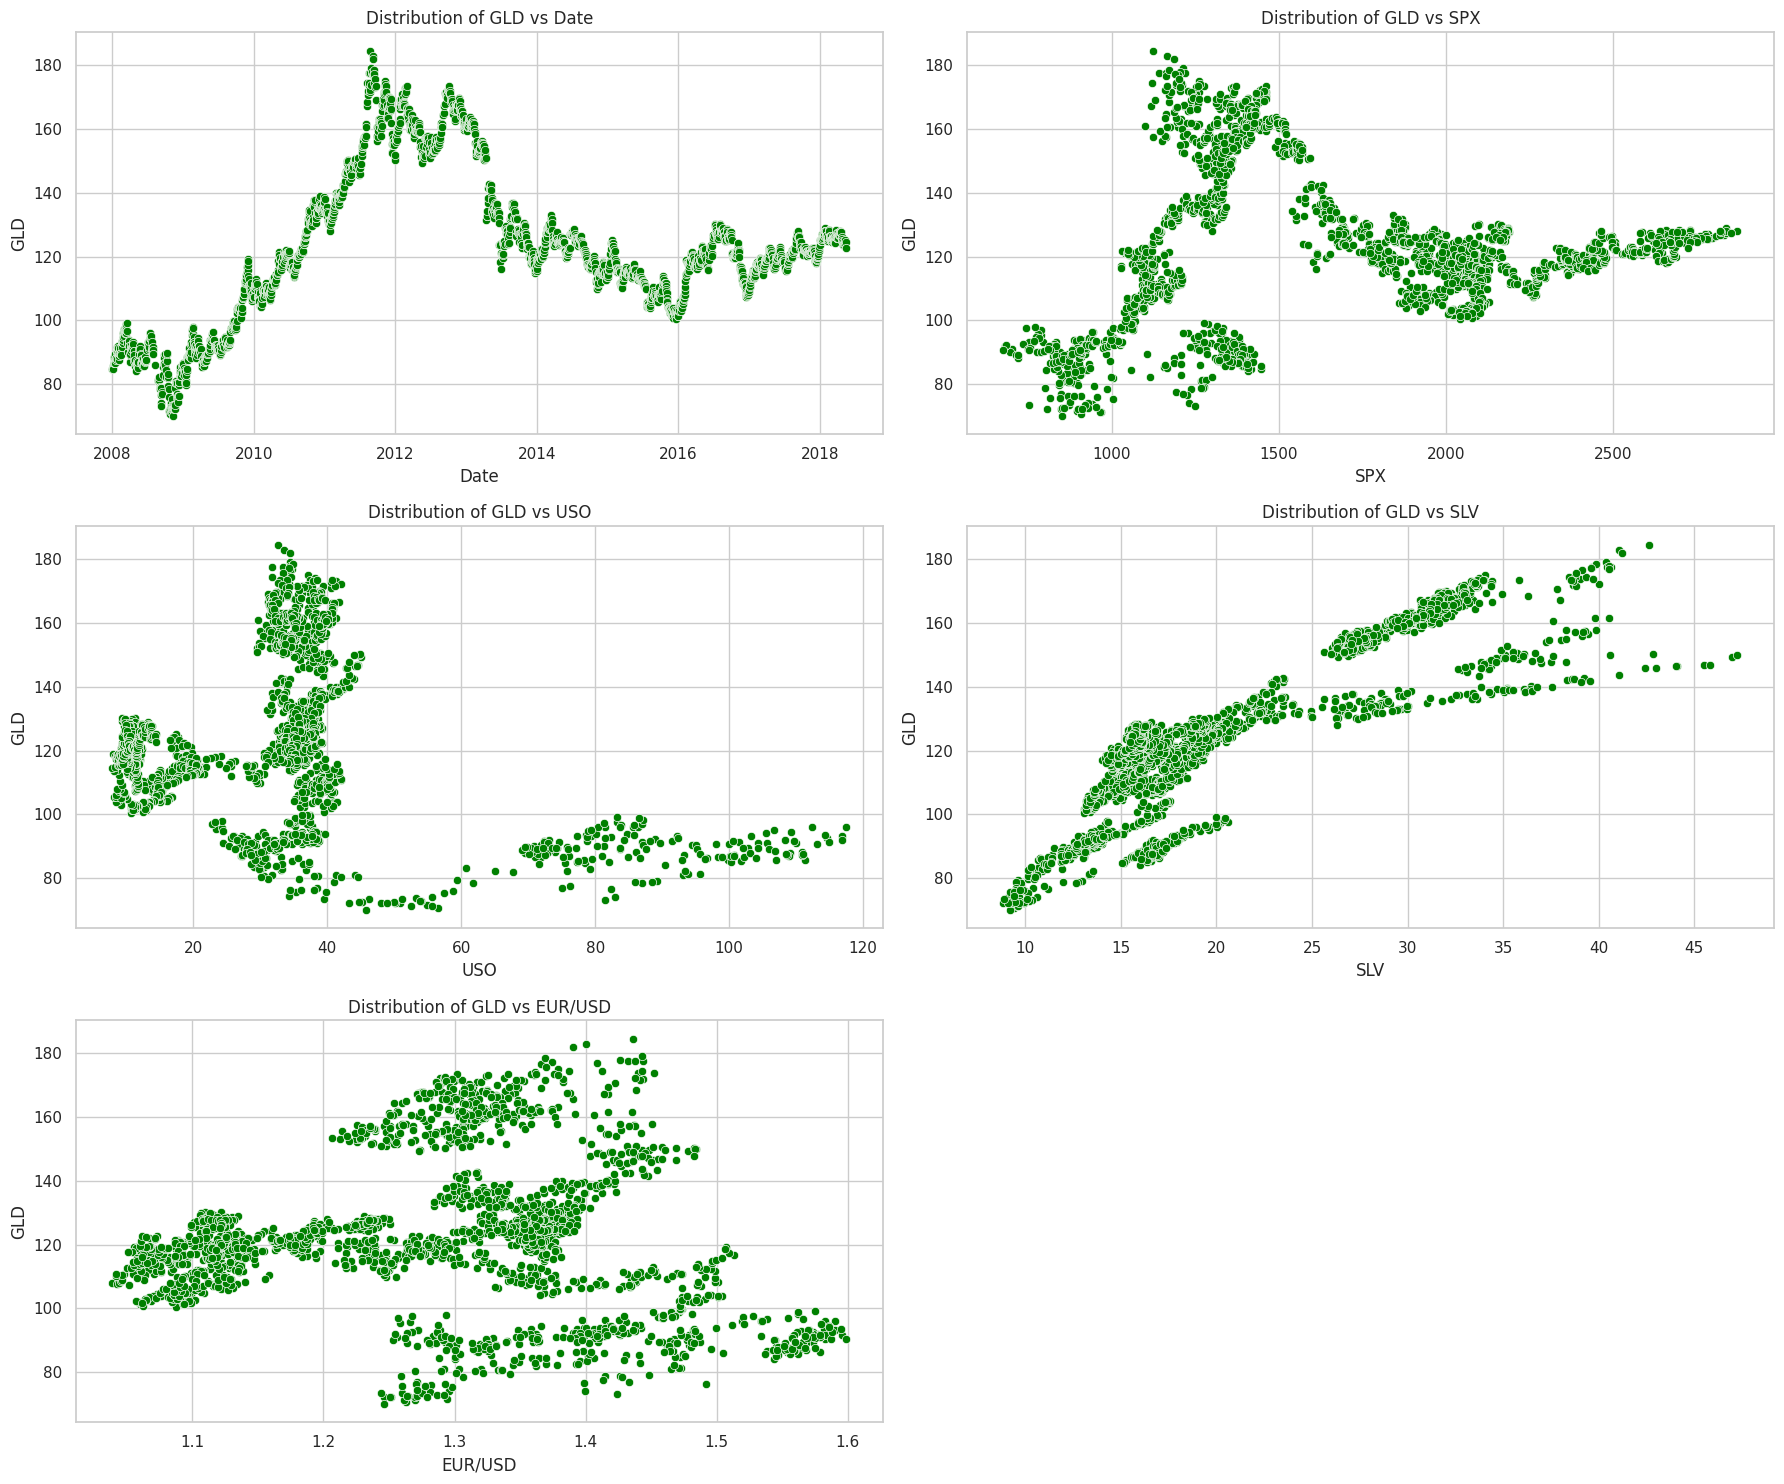

In [ ]:
# Distribution of GLD Vs Other Features
plt.figure(figsize = (18 , 15))
for i , col in enumerate(df.drop("GLD" , axis = 1).columns.to_list() , 1):
    plt.subplot(3,2,i)
    sns.scatterplot(x = df[col] , y = df["GLD"] , color = "Green")
    plt.title(f"Distribution of GLD vs {col}")

plt.tight_layout()

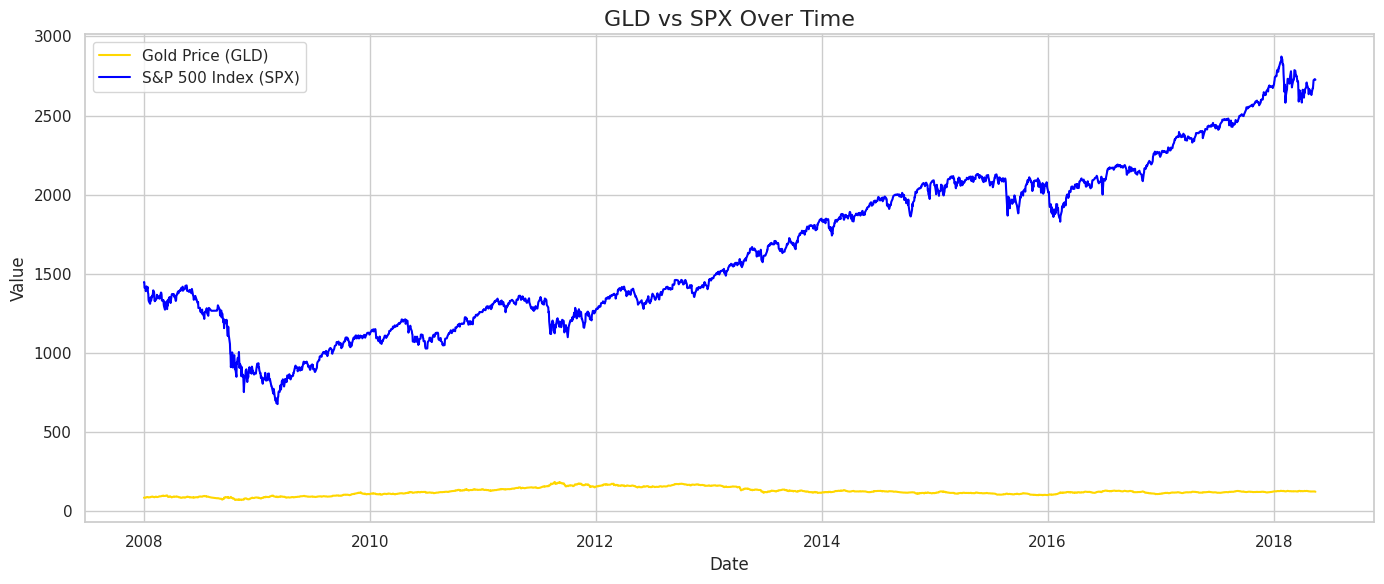

In [ ]:
# Distribution of Date , SPX  and GLD
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='GLD', data=df, label='Gold Price (GLD)', color='gold')
sns.lineplot(x='Date', y='SPX', data=df, label='S&P 500 Index (SPX)', color='blue')
plt.title("GLD vs SPX Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()


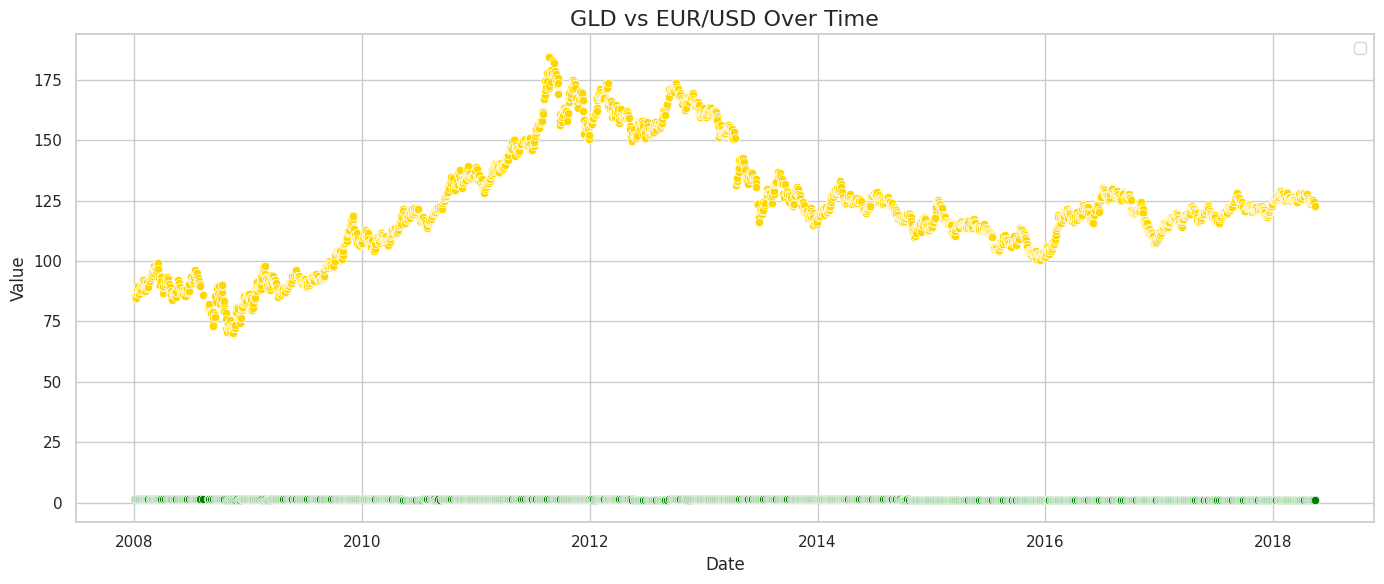

In [ ]:
# Distribution of Date , GLD , EUR/USD
plt.figure(figsize = (14 , 6))
sns.scatterplot(x = "Date" , y = "GLD" , data=df , color = "gold" )
sns.scatterplot(x = "Date" , y = "EUR/USD" , data = df , color = "green" )
plt.title("GLD vs EUR/USD Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()


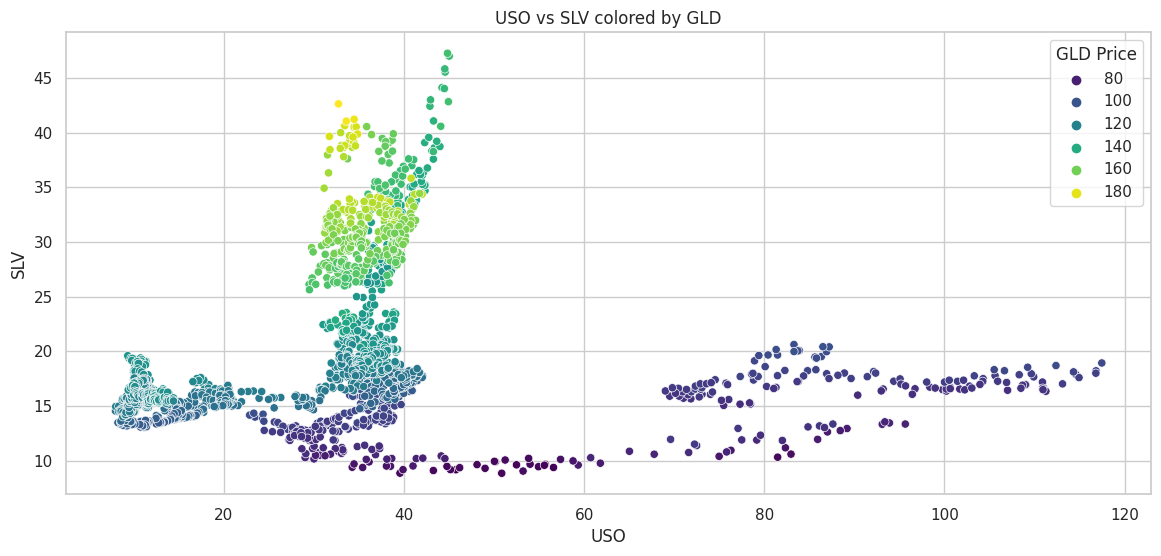

In [ ]:
# USO SLV and GLD
plt.figure(figsize = (14 , 6))
sns.scatterplot(x = "USO" , y = "SLV" , hue = "GLD" , data = df , palette='viridis')
plt.title("USO vs SLV colored by GLD")
plt.legend(title='GLD Price')
plt.show()

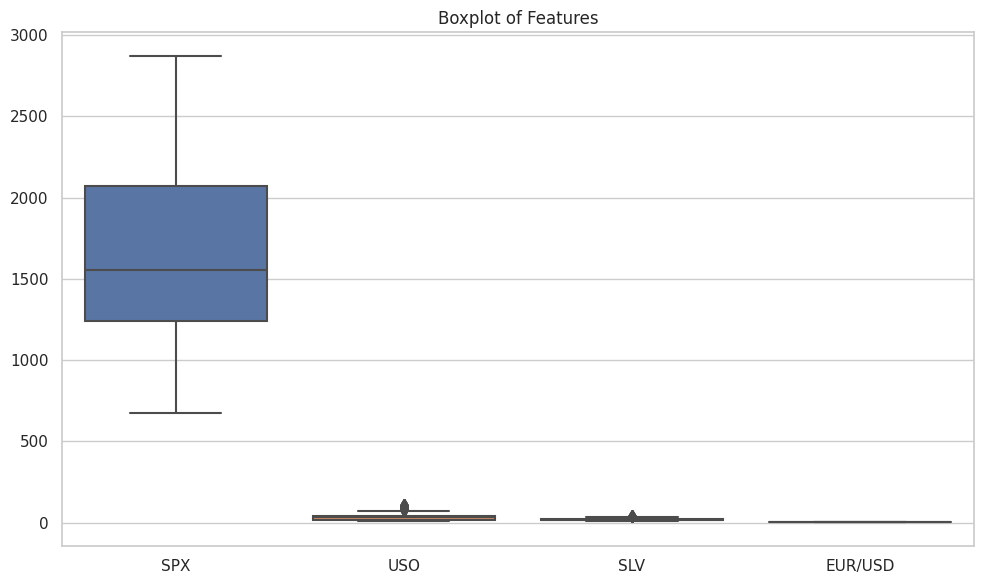

In [ ]:
plt.figure(figsize = (10 , 6))
sns.boxplot(df.drop("GLD" , axis = 1))
plt.title("Boxplot of Features")
plt.tight_layout()

<Axes: >

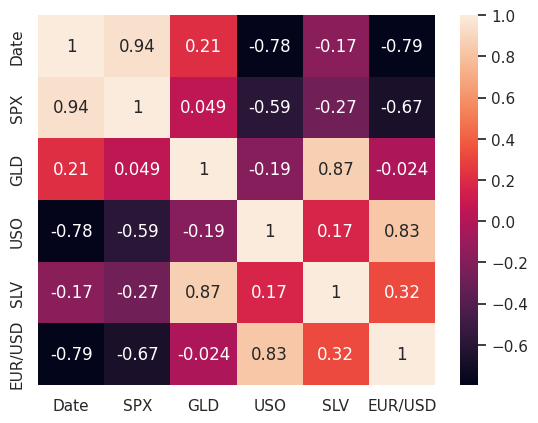

In [ ]:
# correlation matrix
sns.heatmap(df.corr() , annot = True )

In [ ]:
# standardizing
X = df.drop(columns = ["GLD" , "Date"])
sc = StandardScaler()
X_Scaled = sc.fit_transform(X)

In [ ]:
# spliting train , test
y = df["GLD"]
X_train , X_test , y_train , y_test = train_test_split(X_Scaled  , y , test_size = 0.2 , random_state = 42)

In [ ]:
X_Scaled.shape,X_train.shape,X_test.shape

((2290, 4), (1832, 4), (458, 4))

In [ ]:
y.shape,y_train.shape,y_test.shape

((2290,), (1832,), (458,))

#### LinearRegression Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)
print("Mean Absolute Error : " ,metrics.mean_absolute_error(y_test  , y_pred))
print("Mean Squared Error : " , metrics.mean_squared_error(y_test  , y_pred))
print("Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error(y_test  , y_pred)) )
print("R2 Score : " , metrics.r2_score(y_test  , y_pred))

Mean Absolute Error :  5.695900644269292
Mean Squared Error :  56.165594215006024
Root Mean Squared Error :  7.494370835167287
R2 Score :  0.8975640982991402
